# Dimensionality Reduction  in HSI

### code below shows how dimensions are reduced 

#### Imported required libraries for the dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd

####  The HSI dataset we have taken is the "Indian Pines " , the dataset is .npy file gathered from KAGGLE


In [2]:
pavia = np.load('pavia.npy') # training Dataset wd input values
ground_truth = np.load('pavia_gt.npy') # Dataset with output column

#### For processing the hyper spectral image data we are using  python  module  "Spectral" 

In [3]:
!pip install spectral

#### Importing the spectral module

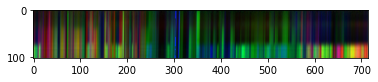

In [7]:
import spectral as sp
view = sp.imshow(pavia, (102, 715, 565))

#### "Shape"  is used to show no of elements per axis(Dimensions)

In [4]:
pavia.shape

(102, 715, 1096)

In [8]:
pavia

array([[[ 854, 1060,  532, ...,  689,  895,  610],
        [ 527,  707,  523, ...,  497,  211,  961],
        [ 374,  143,  816, ...,  947,  971,  443],
        ...,
        [ 367,  465,  408, ...,  812,  802,  592],
        [ 261,  884,  393, ...,  840,  328,  406],
        [1059,  756,  798, ...,  187,  897,  631]],

       [[ 601,  909,  545, ...,  560,  586,  673],
        [ 642,  757,  491, ...,  785,  373,  642],
        [ 322,  419,  681, ...,  634,  881,  641],
        ...,
        [ 432,  547,  539, ...,  483,  635,  589],
        [ 311,  615,  447, ...,  538,  656,  416],
        [ 678,  401,  615, ...,  305,  677,  405]],

       [[ 350,  596,  594, ...,  701,  635,  592],
        [ 575,  646,  321, ..., 1029,  733,  491],
        [ 179,  417,  369, ...,  587,  701,  779],
        ...,
        [ 461,  537,  436, ...,  220,  481,  659],
        [ 366,  401,  476, ...,  494,  680,  395],
        [ 403,  213,  489, ...,  343,  411,  473]],

       ...,

       [[3664, 2963, 167

#### Image display

ImageView object:
  Display bands       :  (102, 715, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 5379.0]
    G: [0.0, 5362.0]
    B: [0.0, 5479.0]

ImageView object:
  Display bands       :  (102, 715, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 5379.0]
    G: [0.0, 5362.0]
    B: [0.0, 6232.0]

ImageView object:
  Display bands       :  (102, 715, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 5379.0]
    G: [0.0, 5362.0]
    B: [0.0, 8000.0]

ImageView object:
  Display bands       :  (102, 715, 3)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 5379.0]
    G: [0.0, 5362.0]
    B: [0.0, 5318.0]

ImageView object:
  Display bands       :  (102, 715, 4)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 5379.0]
    G: [0.0, 5362.0]
    B: [0.0, 5346.0]

ImageView object:
  Display bands       :  (102, 715, 5)
  Interpolation       :  <default>
  RGB da

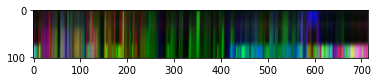

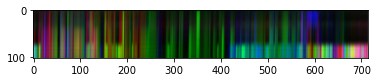

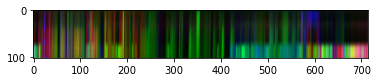

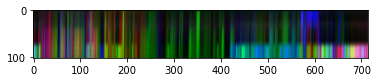

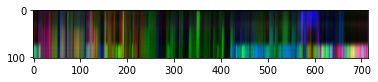

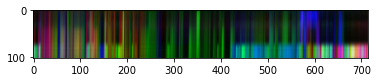

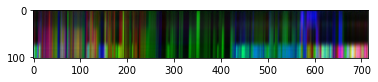

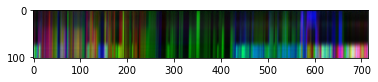

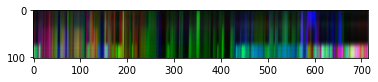

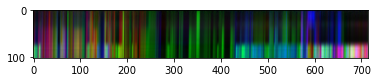

In [9]:
for i in range(10):
    view = sp.imshow(pavia, (102,715, i))
    print(view)

In [10]:
ground_truth.shape

(715, 1096)

In [11]:
print(ground_truth)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### using "matplotlib"

[0 1 2 3 4 5 6 7 8 9]


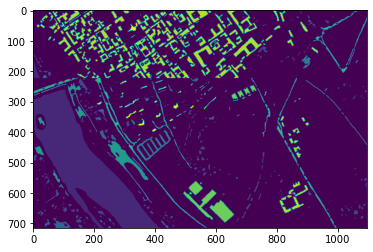

In [12]:
import matplotlib.pyplot as plt
plt.imshow(ground_truth)
print(np.unique(ground_truth)) 

#### Reshaped the dataset arrays and stored in variables

In [15]:
flattened_image = np.reshape(pavia,(-1,pavia.shape[-1]))
flattened_ground = np.reshape(ground_truth,(-1,))

In [16]:
len(flattened_image)
len(flattened_ground)


783640

### 1. Principle Component Analysis (PCA)

In [17]:
''' Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation which converts a set of 
correlated variables to a set of uncorrelated variables. PCA is a most widely used tool in exploratory data analysis and in 
machine learning for predictive models. '''
# https://media.geeksforgeeks.org/wp-content/uploads/m.png

' Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation which converts a set of \ncorrelated variables to a set of uncorrelated variables. PCA is a most widely used tool in exploratory data analysis and in \nmachine learning for predictive models. '

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [19]:
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=10))])
pca_image = pipeline.fit_transform(flattened_image)

### 2. Linear Discriminant Analysis (LDA)

In [20]:
'''Linear discriminant analysis (LDA) is used here to reduce the number of features to a more manageable number before the
process of classification. The linear combinations obtained using Fisher's linear discriminant are called Fisher faces. '''
# https://media.geeksforgeeks.org/wp-content/uploads/20190423132455/ldanewaxis.jpg

"Linear discriminant analysis (LDA) is used here to reduce the number of features to a more manageable number before the\nprocess of classification. The linear combinations obtained using Fisher's linear discriminant are called Fisher faces. "

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [23]:
'''lda_pipeline = Pipeline([('scaling', StandardScaler()), ('lda', LinearDiscriminantAnalysis(n_components=1))])
lda_image = lda_pipeline.fit_transform(flattened_image,flattened_ground)'''

"lda_pipeline = Pipeline([('scaling', StandardScaler()), ('lda', LinearDiscriminantAnalysis(n_components=1))])\nlda_image = lda_pipeline.fit_transform(flattened_image,flattened_ground)"

### 3. Independent Component Analysis (ICA) 

In [24]:
''' Independent Component Analysis (ICA) is a machine learning technique to separate independent sources from a mixed signal.
Unlike principal component analysis which focuses on maximizing the variance of the data points, the independent component 
analysis focuses on independence, i.e. independent components '''
# https://media.geeksforgeeks.org/wp-content/uploads/20190521012201/ica.jpg

' Independent Component Analysis (ICA) is a machine learning technique to separate independent sources from a mixed signal.\nUnlike principal component analysis which focuses on maximizing the variance of the data points, the independent component \nanalysis focuses on independence, i.e. independent components '

In [25]:
from sklearn.decomposition import FastICA

In [26]:
ica_pipeline = Pipeline([('scaling', StandardScaler()), ('ica', FastICA(n_components=10))])
ica_image = ica_pipeline.fit_transform(flattened_image,flattened_ground)

In [27]:
norm_flattened = StandardScaler().fit_transform(flattened_image)

In [28]:
def flatten(X):
    if len(X.shape) <= 2:
        X = X
    else:
        X = np.reshape(X,(-1,X.shape[-1]))
    return X

In [29]:
def standard(X):
    from sklearn.preprocessing import StandardScaler
    return StandardScaler().fit_transform(flatten(X))

In [30]:
def unflatten(X,size=145):
    return np.reshape(X,(size,-1,X.shape[-1]))


In [31]:
class VarianceScorer:
    def __init__(self,X_perfect):
        self._original_variance = np.var(standard(X_perfect),axis = 0)
        self._original = flatten(X_perfect)
    
    def score(self,X):
        current_variance = np.var(flatten(X),axis = 0)
        return (sum(current_variance) / sum(self._original_variance))

In [32]:
def neighbour_score(X,mode="prepend"):
    d1 = np.linalg.norm(np.diff(X,axis = 0,prepend = 0),axis = -1)
    d2 = np.linalg.norm(np.flip(np.diff(np.flip(X,axis=0),axis = 0,prepend = 0),axis=0),axis=-1)
    d3 = np.linalg.norm(np.diff(X,axis = 1,prepend = 0),axis=-1)
    d4 = np.linalg.norm(np.flip(np.diff(np.flip(X,axis=1),axis = 1,prepend = 0),axis=1),axis=-1)
    return np.dstack([d1,d2,d3,d4])

In [33]:
class NeighbourhoodScorer:
    def __init__(self,X_perfect):
        self._original_neighbourhood = self._neighbour_score(X_perfect)
        self._original = flatten(X_perfect)
        
    def _neighbour_score(self,X,mode="wrap"):
        if mode == "prepend":
            # Results in ~0.99699-0.99853 for num_components~50-75
            d1 = np.linalg.norm(np.diff(X,axis = 0,prepend = 0),axis = -1)
            d2 = np.linalg.norm(np.flip(np.diff(np.flip(X,axis=0),axis = 0,prepend = 0),axis=0),axis=-1)
            d3 = np.linalg.norm(np.diff(X,axis = 1,prepend = 0),axis=-1)
            d4 = np.linalg.norm(np.flip(np.diff(np.flip(X,axis=1),axis = 1,prepend = 0),axis=1),axis=-1)
        elif mode == "wrap":
            # Results in ~0.99695-0.99852 for num_component~50-75
            d1 = np.linalg.norm(X - np.roll(X,shift=1,axis=0),axis = -1)
            d2 = np.linalg.norm(X - np.roll(X,shift=-1,axis=0),axis = -1)
            d3 = np.linalg.norm(X - np.roll(X,shift=1,axis=1),axis = -1)
            d4 = np.linalg.norm(X - np.roll(X,shift=-1,axis=1),axis = -1)
        return np.dstack([d1,d2,d3,d4])
    
    def score(self,X):
        current_mat = self._neighbour_score(X)
        return 1/(1+np.linalg.norm(current_mat - self._original_neighbourhood)/(current_mat.shape[0]*current_mat.shape[1]))
    
    def score1(self,X):
        current_mat = self._neighbour_score(X)
        scale = np.mean(current_mat,axis=(0,1)) / np.mean(self._original_neighbourhood,axis=(0,1))
        bias = np.mean(self._original_neighbourhood - (current_mat/scale))
        return 1/(1+np.linalg.norm((current_mat/scale) + bias - self._original_neighbourhood)/(current_mat.shape[0]*current_mat.shape[1]))

### Performance

In [35]:
Scorer = VarianceScorer(pavia)
pca_vs=Scorer.score(pca_image)
pca_vs

0.47393636855704896

In [80]:
Scorer = VarianceScorer(pavia)
lda_vs=Scorer.score(lda_image)
lda_vs

NameError: name 'lda_image' is not defined

In [37]:
Scorer = VarianceScorer(pavia)
ica_vs=Scorer.score(ica_image)
ica_vs

1.25107467314423e-07

### Time consumption  

In [33]:
%timeit Scorer.score(lda_image)

NameError: name 'lda_image' is not defined

In [38]:
%timeit Scorer.score(pca_image)

12.4 ms ± 260 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [39]:
%timeit Scorer.score(ica_image)

7.42 ms ± 261 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Performance After Error Rate reduction

In [41]:
Scorer1 = NeighbourhoodScorer(unflatten(standard(pavia),102))
pca_ns=Scorer1.score1(unflatten(pca_image,102))
pca_ns

0.9611755100193374

In [94]:
Scorer1 = NeighbourhoodScorer(unflatten(standard(pavia),102))
lda_ns=Scorer1.score1(unflatten(lda_image,102))
lda_ns

NameError: name 'lda_image' is not defined

In [42]:
Scorer1 = NeighbourhoodScorer(unflatten(standard(pavia),102))
ica_ns=Scorer1.score1(unflatten(ica_image,102))
ica_ns

0.9633671564096515

### Time consumption  After Error Rate reduction

In [44]:
%timeit Scorer1.score1(unflatten(pca_image,102))

85.1 ms ± 2.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [101]:
%timeit Scorer1.score1(unflatten(lda_image,102))

NameError: name 'lda_image' is not defined

In [45]:
%timeit Scorer1.score1(unflatten(ica_image,102))

69.8 ms ± 3.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


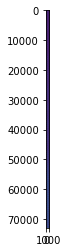

In [46]:
plt.imshow(flattened_image)

#### variance

In [47]:
#variance scores 
print("PCA Variance Score:",pca_vs*100)
#print("LDA Variance Score:",lda_vs*100)
print("ICA Variance Score:",ica_vs*100)



PCA Variance Score: 47.3936368557049
ICA Variance Score: 1.25107467314423e-05


#### Neighbour hood

In [48]:
#Neighbour hood scores
print("PCA NeighbourHood Score:",pca_ns*100)
#print("LDA NeighbourHood Score:",lda_ns*100)
print("ICA NeighbourHood Score:",ica_ns*100)



PCA NeighbourHood Score: 96.11755100193375
ICA NeighbourHood Score: 96.33671564096515


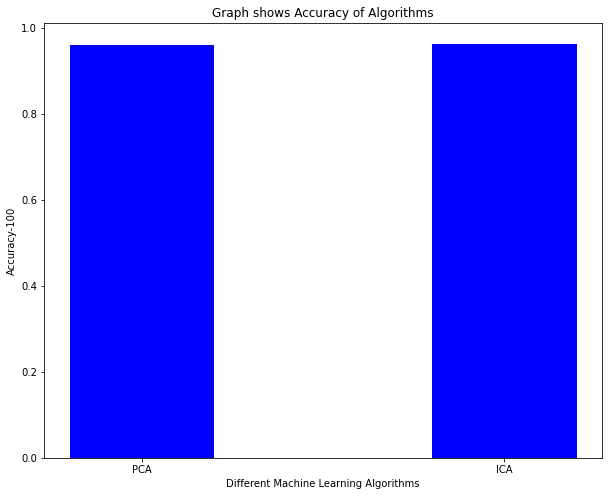

In [49]:
#NeighbourHood Scores are much better than Variance Scores

# creating the dataset
data = {'PCA':pca_ns,  'ICA':ica_ns}

courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 8))

# creating the bar plot
plt.bar(courses, values, color ='blue',width = 0.4)

plt.xlabel("Different Machine Learning Algorithms")
plt.ylabel("Accuracy-100")
plt.title("Graph shows Accuracy of Algorithms")
plt.show()


In [ ]:
# From Above graph we came conclude that 
#  PCA is efficient on Indian Pines Dataset